First few rows of the dataset:
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  U

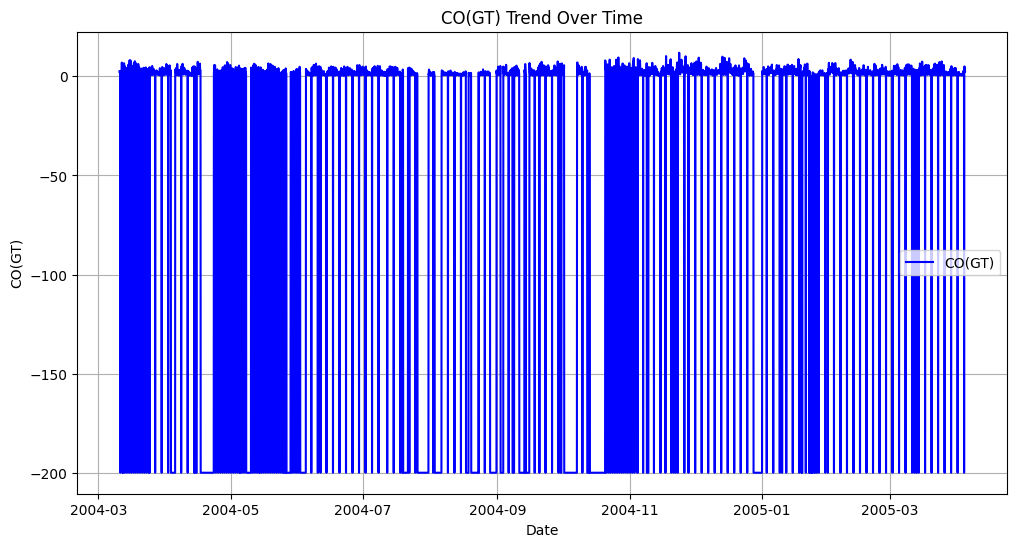

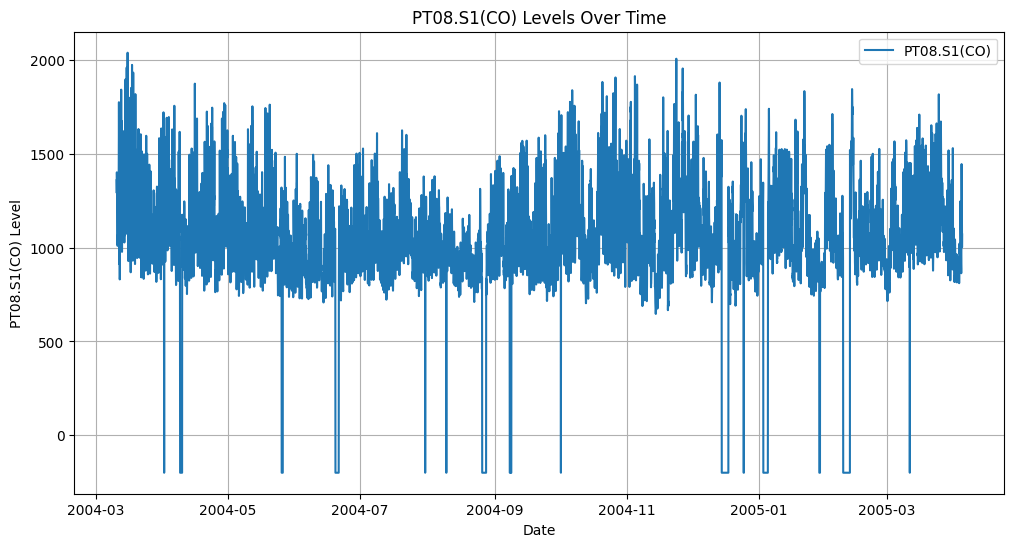

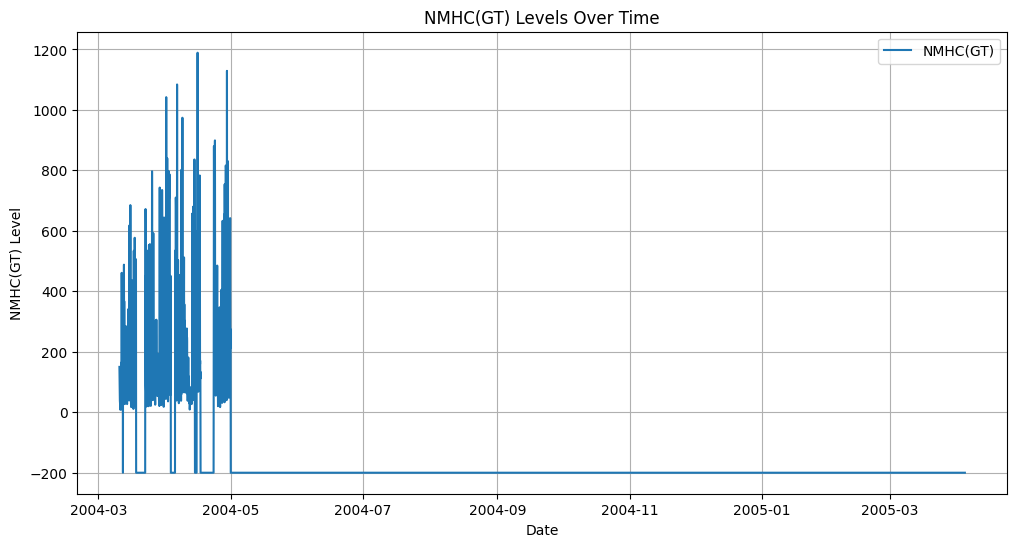

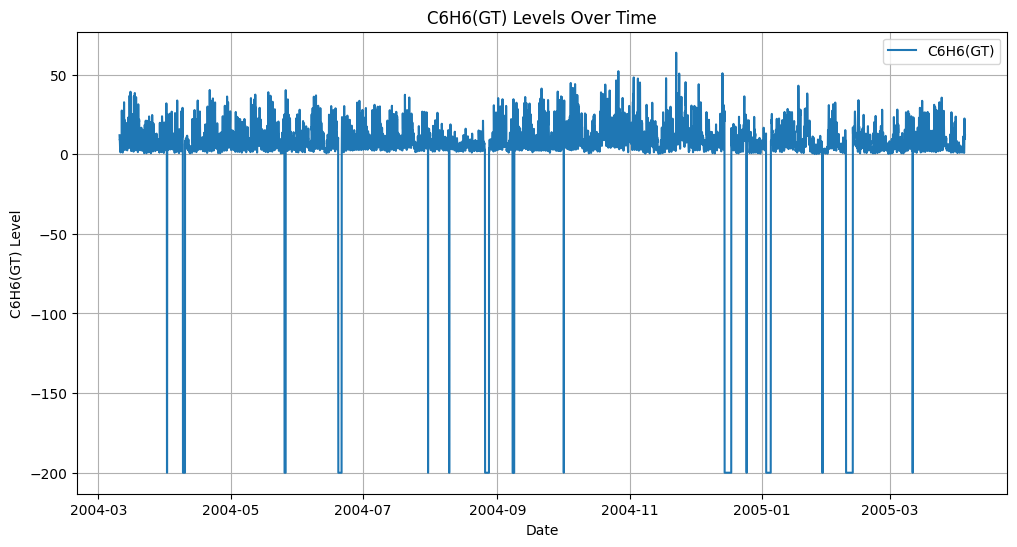

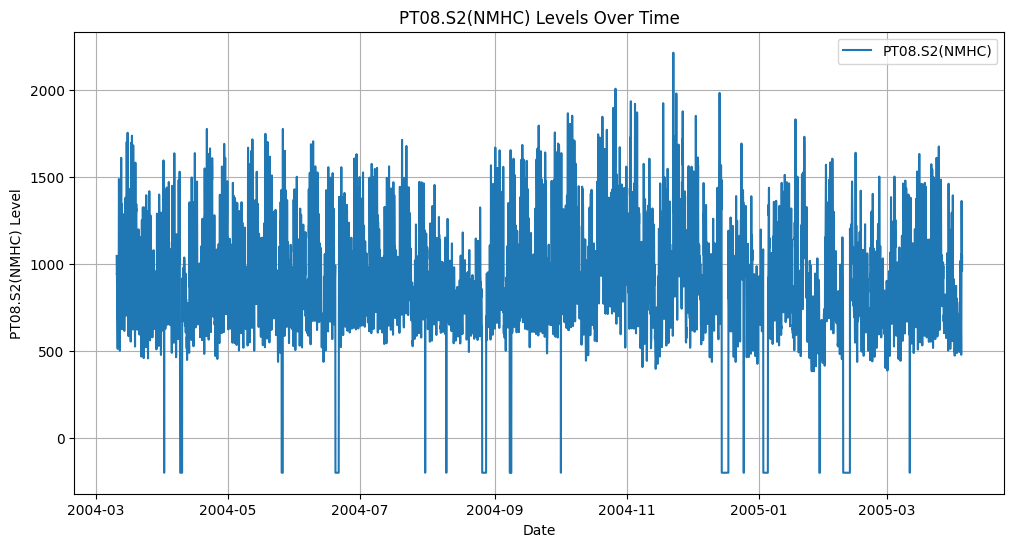

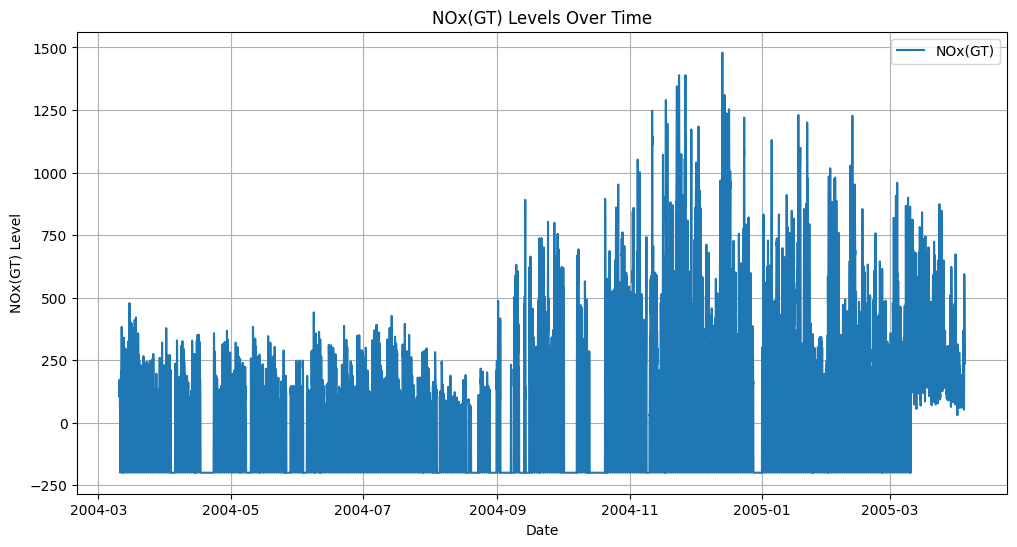

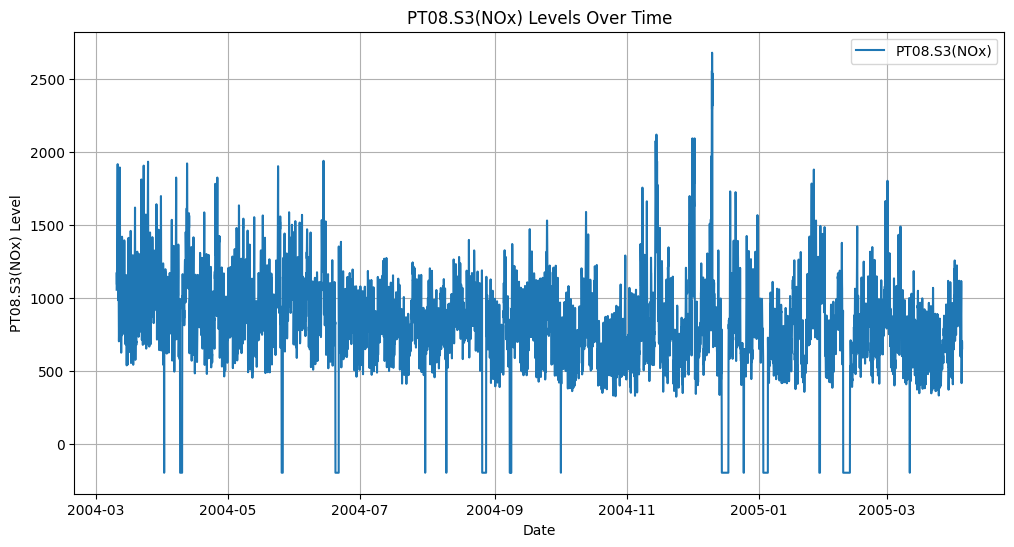

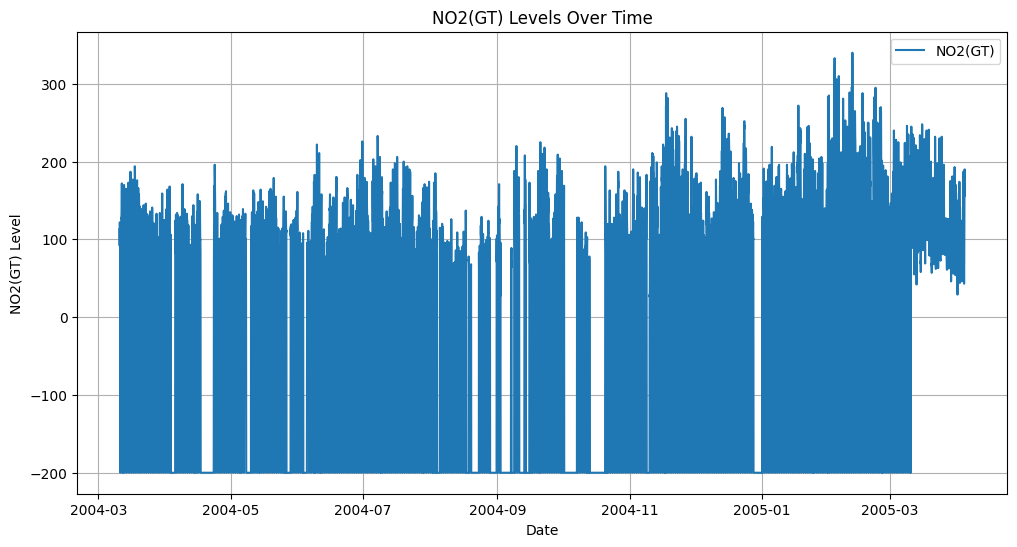

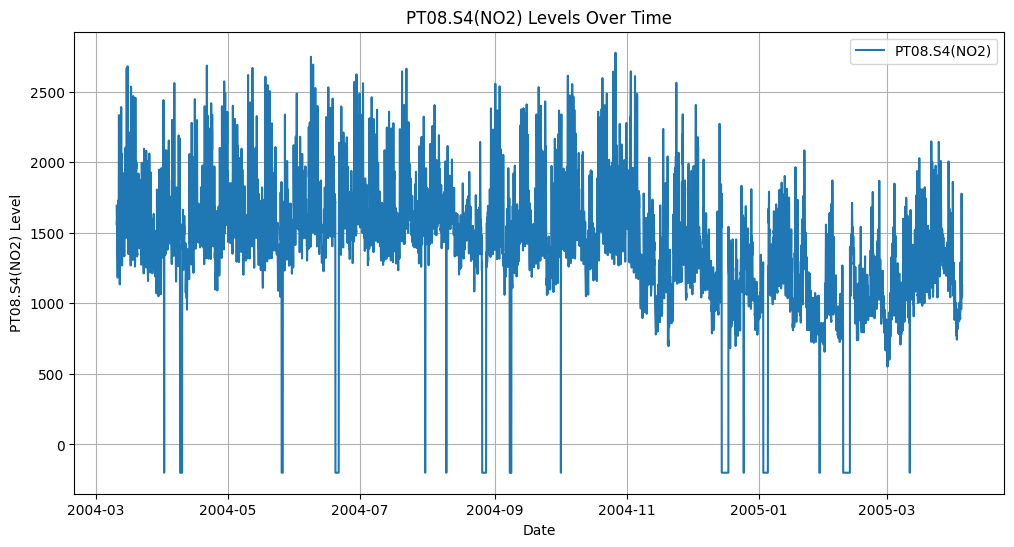

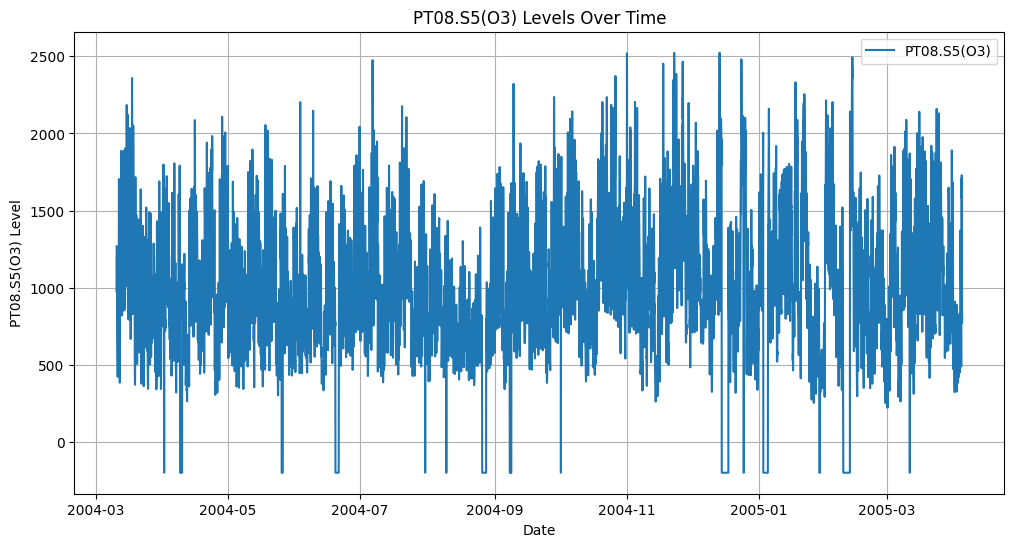

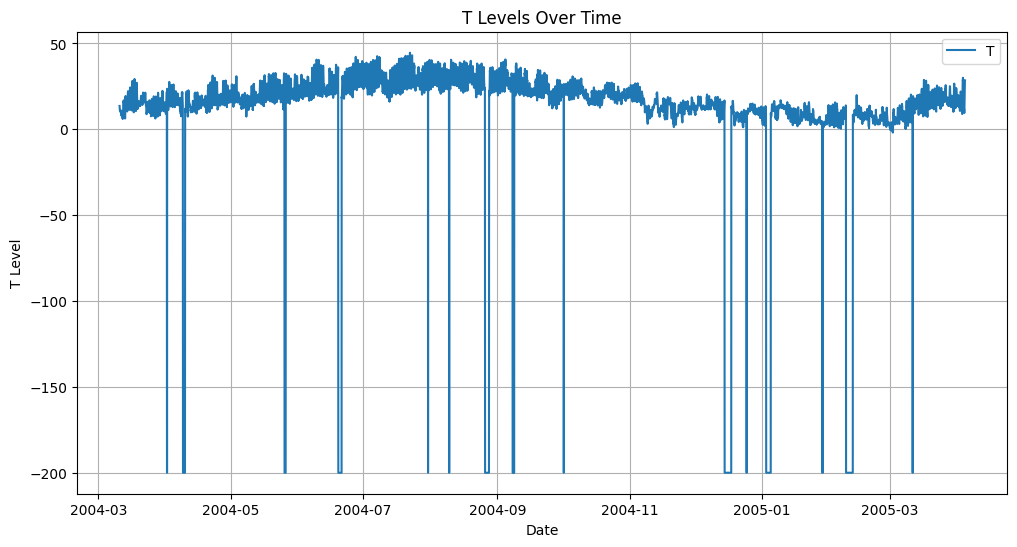

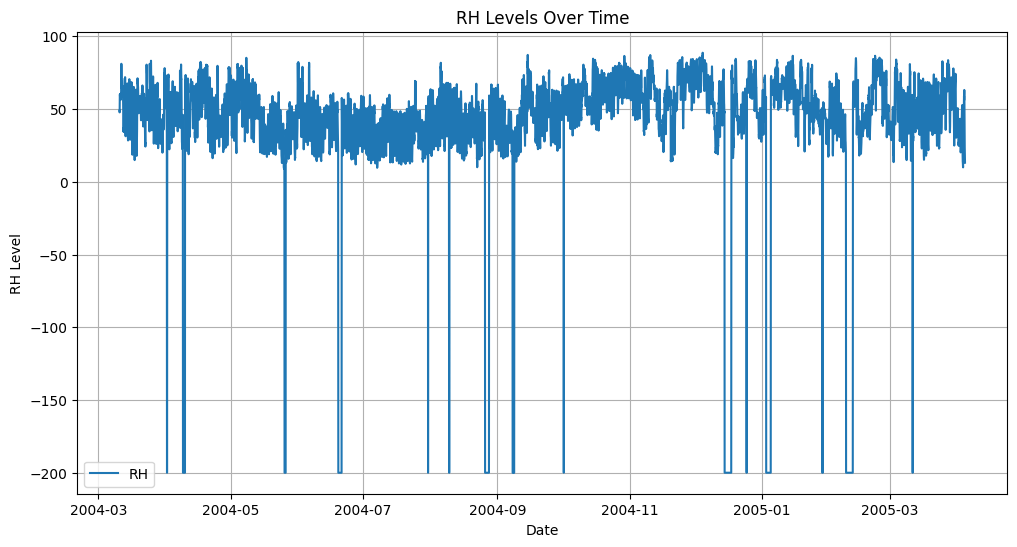

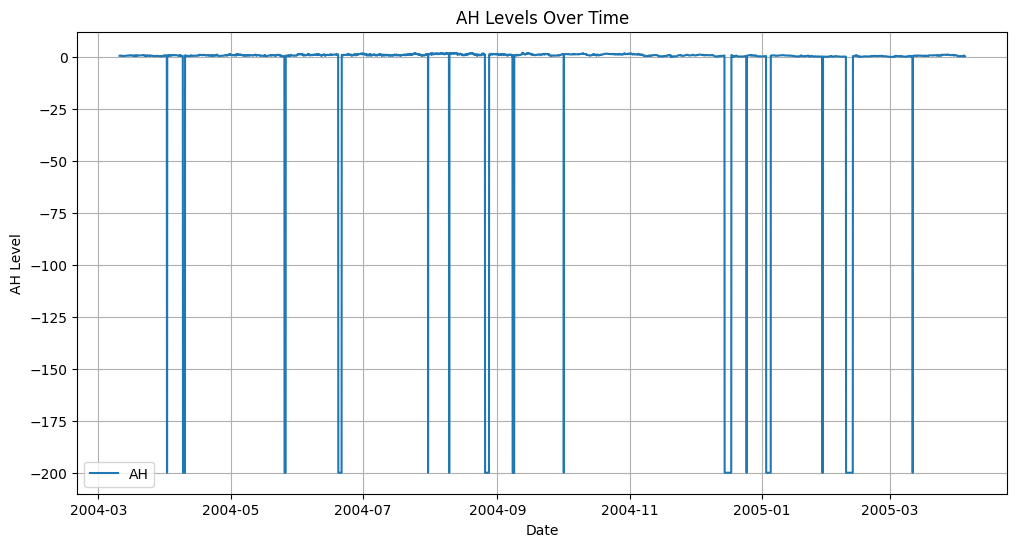

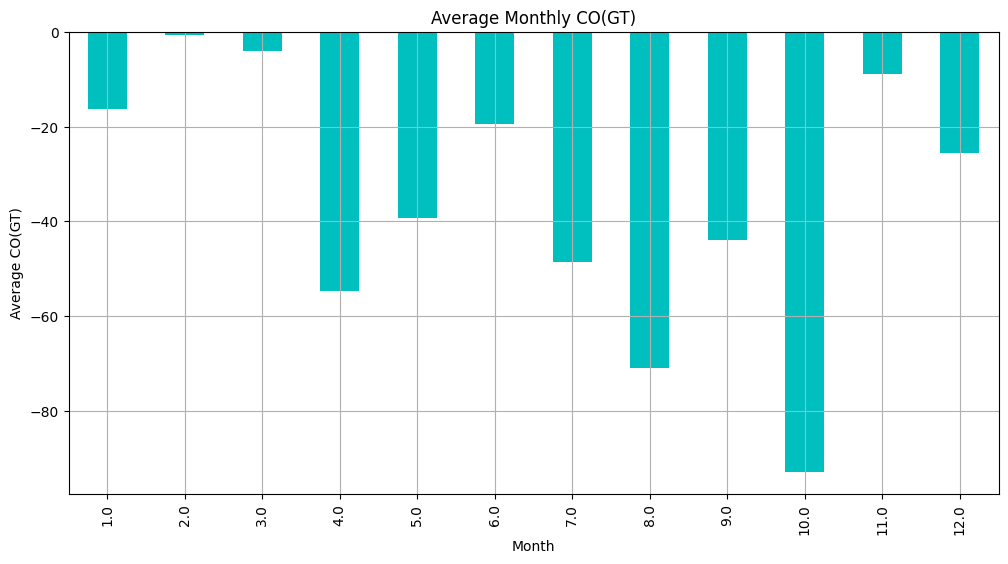

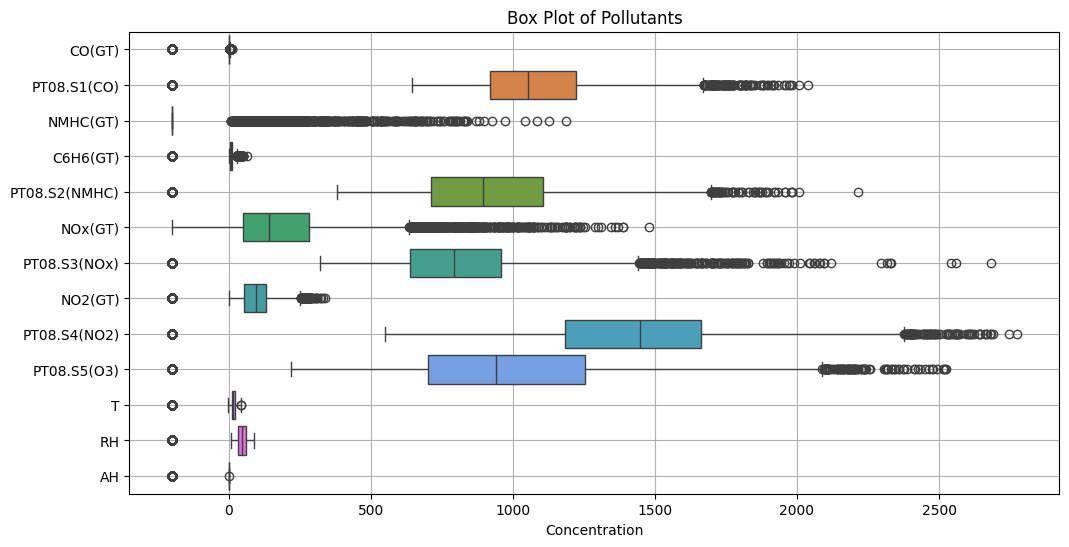

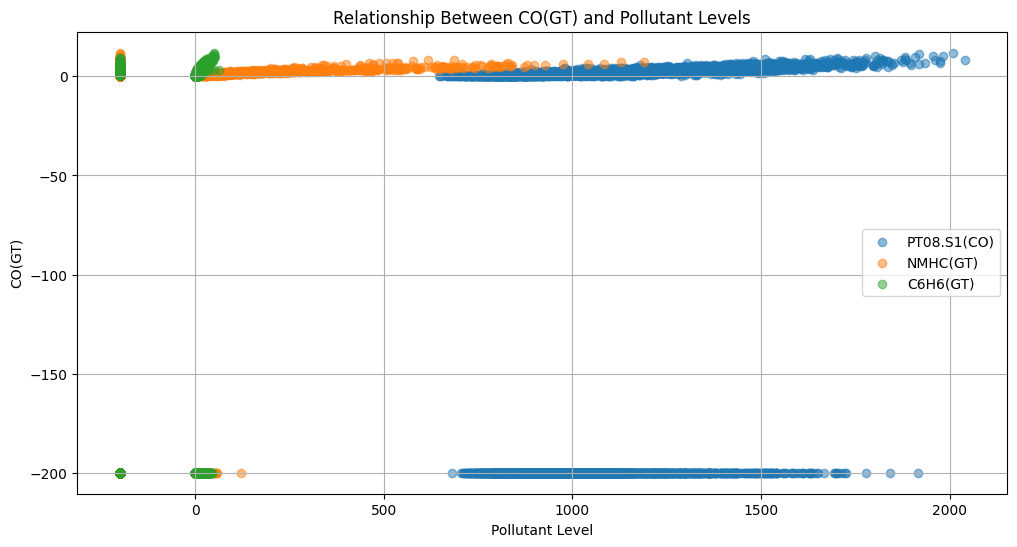

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\MUBASHIR KHAN\Desktop\jupyter\DMV\AirQuality.csv"
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows and columns of the dataframe
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names in the dataset:")
print(df.columns)

# Replace commas with dots in numeric columns
for col in df.columns[2:]:
    df[col] = df[col].apply(lambda x: str(x).replace(',', '.')).astype(float)

# Combine Date and Time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Drop the original Date and Time columns
df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

# Plotting CO(GT) Trends over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='b')
plt.title('CO(GT) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting individual pollutant levels over time
pollutants = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
              'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[pollutant], label=pollutant)
    plt.title(f'{pollutant} Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# Bar plot comparing average pollutant levels across different months
df['month'] = df.index.month
monthly_avg = df.groupby('month').mean()

plt.figure(figsize=(12, 6))
monthly_avg['CO(GT)'].plot(kind='bar', color='c')
plt.title('Average Monthly CO(GT)')
plt.xlabel('Month')
plt.ylabel('Average CO(GT)')
plt.grid(True)
plt.show()

# Box plot for pollutant values
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                    'T', 'RH', 'AH']], orient='h')
plt.title('Box Plot of Pollutants')
plt.xlabel('Concentration')
plt.grid(True)
plt.show()

# Scatter plot to explore the relationship between CO(GT) and other pollutant levels
plt.figure(figsize=(12, 6))
plt.scatter(df['PT08.S1(CO)'], df['CO(GT)'], label='PT08.S1(CO)', alpha=0.5)
plt.scatter(df['NMHC(GT)'], df['CO(GT)'], label='NMHC(GT)', alpha=0.5)
plt.scatter(df['C6H6(GT)'], df['CO(GT)'], label='C6H6(GT)', alpha=0.5)
plt.title('Relationship Between CO(GT) and Pollutant Levels')
plt.xlabel('Pollutant Level')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.show()